The shape of X is: (2, 2000)
The shape of Y is: (1, 2000)
I have m = 2000 training examples!


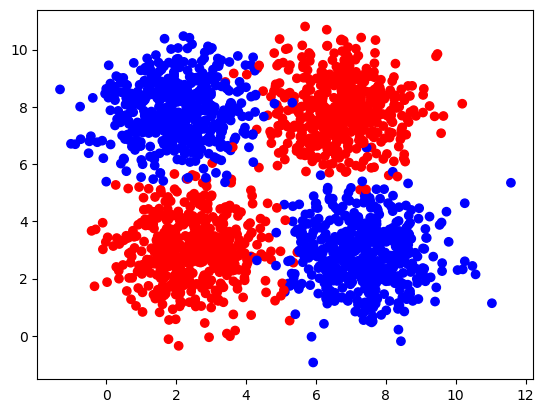

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# A function to create a dataset.
from sklearn.datasets import make_blobs

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline

# Set a seed so that the results are consistent.
np.random.seed(3)

m = 2000
samples, labels = make_blobs(n_samples=m,
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]),
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0) | (labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 0
X = np.transpose(samples)
Y = labels.reshape((1, m))

plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('I have m = %d training examples!' % (m))

In [3]:

import json
def serialize_training_data(X, Y):
    data = {
        'features': X.tolist(),  # Convert numpy array to nested Python list
        'labels': Y.tolist(),
        'shape_x': X.shape,
        'shape_y': Y.shape
    }

    # Save to file
    with open('./training_data.json', 'w') as f:
        json.dump(data, f)

    return data

# Use it with your data
_ = serialize_training_data(X, Y)

In [36]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (~ 3 lines of code)
    # Size of input layer.
    n_x = X.shape[0]
    # Size of hidden layer.
    n_h = 2
    # Size of output layer.
    n_y = Y.shape[0]
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

(n_x, n_h, n_y) = layer_sizes(X, Y)

def sigmoid(z):
    ### START CODE HERE ### (~ 1 line of code)
    res = 1 / (1 + np.power(np.e, -1 * z))
    ### END CODE HERE ###

    return res

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- the sigmoid output of the second activation
    cache -- python dictionary containing Z1, A1, Z2, A2
    (that simplifies the calculations in the back propagation step)
    """
    # Retrieve each parameter from the dictionary "parameters".
    ### START CODE HERE ### (~ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###

    # Implement forward propagation to calculate A2.
    ### START CODE HERE ### (~ 4 lines of code)
    Z1 = W1 @ X + b1
    A1 = sigmoid(Z1)
    Z2 = W2 @ A1 + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###

    assert(A2.shape == (n_y, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (blue: 0 / red: 1)
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = np.where(A2 < 0.5, False, True)
    ### END CODE HERE ###

    return predictions

def plot_decision_boundary(predict, parameters, X, Y, i, filename=None):
    # Define bounds of the domain.
    min1, max1 = X[0, :].min()-1, X[0, :].max()+1
    min2, max2 = X[1, :].min()-1, X[1, :].max()+1
    # Define the x and y scale.
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # Create all of the lines and rows of the grid.
    xx, yy = np.meshgrid(x1grid, x2grid)
    # Flatten each grid to a vector.
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((1, len(r1))), r2.reshape((1, len(r2)))
    # Vertical stack vectors to create x1,x2 input for the model.
    grid = np.vstack((r1,r2))
    # Make predictions for the grid.
    predictions = predict(grid, parameters)
    # Reshape the predictions back into a grid.
    zz = predictions.reshape(xx.shape)
    # Plot the grid of x, y and z values as a surface.
    plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral.reversed())
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']))
    plt.title("Decision Boundary: Iteration {}".format(i))

    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()


In [37]:
def plot_all_boundaries():
    with open('../network_params.json', 'r') as f:
        params = json.load(f)

    for i in range(len(params)):
        param = params[i]

        # Convert to numpy arrays
        W1 = np.array(param['w1'])
        b1 = np.array(param['b1'])
        W2 = np.array(param['w2'])
        b2 = np.array(param['b2'])

        plot_decision_boundary(predict, {
            "W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2
        }, X, Y, i, "boundary_{}.png".format(i + 1))

In [38]:
plot_all_boundaries()

In [ ]:
our_params = {"W1": np.array( [[2.2794608950420905, -2.402028306627368],
                               [3.0330861655401615, -2.0871417451968686]]),
              "b1": np.array(  [[-3.35552952368655],
                                [4.079092796357969]]),
              "W2": np.array([[-5.969071612968364, 5.5643682686272316]]),
              "b2": np.array(  [[-2.2793680740535853]])}
# Plot the decision boundary.
plot_decision_boundary(predict, our_params, X, Y)
plt.title("Decision Boundary: Iteration 3" + str(n_h))